# Python Class Project: Analysis of New York Mets Baseball Team
Student: Robert Glover

Class: Code Louisville Python July 2019

## Introduction

The `New York Mets` are a sad baseball team, one perennially mired in the "middle of the diamond."  There are many areas of needed improvement, but is there one area of possible improvement?

In this project, I will look at pitching, batting, and fielding statistics and attempt to find the best area to focus their resources.

## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

I'm not sure if I'm going to use the current working directory, but just in case...

In [2]:
# Get the current working directory:
os.getcwd()

'C:\\Users\\robertg\\Git\\codelouisville\\python-class-project'

## Data Import
Read data from `CSV` files and verify data by getting the top three values:

In [3]:
players = pd.read_csv(os.path.join('baseballdatabank-2019.2', 'core', 'People.csv'), index_col=0)
batting = pd.read_csv(os.path.join('baseballdatabank-2019.2', 'core', 'Batting.csv'), index_col=0)
fielding = pd.read_csv(os.path.join('baseballdatabank-2019.2', 'core', 'Fielding.csv'), index_col=0)
fielding2 = pd.read_csv(os.path.join('baseballdatabank-2019.2', 'core', 'FieldingOFsplit.csv'), index_col=0)
pitching = pd.read_csv(os.path.join('baseballdatabank-2019.2', 'core', 'Pitching.csv'), index_col=0)
teams = pd.read_csv(os.path.join('baseballdatabank-2019.2', 'core', 'Teams.csv'), index_col=0)

len(players), len(batting), len(fielding), len(fielding2), len(pitching), len(teams)

(19617, 105861, 140921, 32602, 46699, 2895)

In [4]:
players.head(3)

,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01


In [5]:
batting.head(3)

,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,
abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0


In [6]:
 fielding.head(3)

,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
playerID,,,,,,,,,,,,,,,,,
abercda01,1871,1,TRO,NaN,SS,1,1.0,24.0,1,3,2.0,0,NaN,NaN,NaN,NaN,NaN
addybo01,1871,1,RC1,NaN,2B,22,22.0,606.0,67,72,42.0,5,NaN,NaN,NaN,NaN,NaN
addybo01,1871,1,RC1,NaN,SS,3,3.0,96.0,8,14,7.0,0,NaN,NaN,NaN,NaN,NaN


In [7]:
fielding2.head(3)

,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
playerID,,,,,,,,,,,,,,,,,
aaronha01,1954,1,ML1,NL,LF,105,102,2773,205,4,6,0,NaN,NaN,NaN,NaN,NaN
aaronha01,1954,1,ML1,NL,RF,11,11,320,12,1,1,1,NaN,NaN,NaN,NaN,NaN
abramca01,1954,1,PIT,NL,LF,5,5,120,12,2,0,0,NaN,NaN,NaN,NaN,NaN


In [8]:
pitching.head(3)

,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,
bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN


In [9]:
teams.head(3)

,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
yearID,,,,,,,,,,,,,,,,,,,,,
1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1


## Create SQL Database
Create a `SQLite` database and import the data from the `CSV` files into tables in the database.

In [10]:
baseballdb = sqlite3.connect("baseball.db")

Replace the data for all tables except "fielding2," which is appended:

In [11]:
players.to_sql("players", baseballdb, if_exists = "replace")
batting.to_sql("batting", baseballdb, if_exists = "replace")
fielding.to_sql("fielding", baseballdb, if_exists = "replace")
fielding2.to_sql("fielding", baseballdb, if_exists = "append")
pitching.to_sql("pitching", baseballdb, if_exists = "replace")
teams.to_sql("teams", baseballdb, if_exists = "replace")

Verify that the two fielding tables have been combined properly by checking the count in the table versus the counts from the `CSV` files:

In [12]:
len(fielding) + len(fielding2)

173523

In [13]:
total_fielding = pd.read_sql_query("SELECT COUNT(*) FROM fielding", baseballdb)
total_fielding

,COUNT(*)
0,173523


Verify the database schema:

In [14]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type = 'table'", baseballdb)

,name
0,players
1,batting
2,fielding
3,pitching
4,teams


Verify the data with a simple query:

In [15]:
pd.read_sql_query("SELECT birthYear, birthCity FROM players WHERE playerID = 'aaronha01'", baseballdb)

,birthYear,birthCity
0,1934.0,Mobile


## Retrieve Mets Data

### Team Data
Get the Mets' teamID from the `teams` table:

In [16]:
pd.read_sql_query("SELECT * FROM teams WHERE yearID=2018 AND lgID='NL' ORDER BY teamID", baseballdb)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,2018,NL,ARI,ARI,W,3,162,81.0,82,80,...,152,0.988,Arizona Diamondbacks,Chase Field,2242695.0,108,107,ARI,ARI,ARI
1,2018,NL,ATL,ATL,E,1,162,81.0,90,72,...,134,0.986,Atlanta Braves,SunTrust Park,2555781.0,100,100,ATL,ATL,ATL
2,2018,NL,CHN,CHC,C,2,163,82.0,95,68,...,155,0.983,Chicago Cubs,Wrigley Field,3181089.0,107,106,CHC,CHN,CHN
3,2018,NL,CIN,CIN,C,5,162,81.0,67,95,...,144,0.984,Cincinnati Reds,Great American Ball Park,1629356.0,103,104,CIN,CIN,CIN
4,2018,NL,COL,COL,W,2,163,81.0,91,72,...,162,0.988,Colorado Rockies,Coors Field,3015880.0,117,116,COL,COL,COL
5,2018,NL,LAN,LAD,W,1,163,82.0,92,71,...,111,0.983,Los Angeles Dodgers,Dodger Stadium,3857500.0,98,96,LAD,LAN,LAN
6,2018,NL,MIA,FLA,E,5,161,81.0,63,98,...,133,0.986,Miami Marlins,Marlins Park,811104.0,89,90,MIA,FLO,MIA
7,2018,NL,MIL,MIL,C,1,163,81.0,96,67,...,141,0.982,Milwaukee Brewers,Miller Park,2850875.0,102,101,MIL,ML4,MIL
8,2018,NL,NYN,NYM,E,4,162,81.0,77,85,...,121,0.985,New York Mets,Citi Field,2224995.0,90,91,NYM,NYN,NYN
9,2018,NL,PHI,PHI,E,3,162,81.0,80,82,...,138,0.979,Philadelphia Phillies,Citizens Bank Park,2158124.0,102,103,PHI,PHI,PHI


The Mets' teamID is NYN.  (NYM is their franchise ID [franchID].)

### Batting Statistics
Get the Mets batting statistics.  This query joins the `batting` table with the `players` table to retrieve data for the `Mets` from 2018.  The query retrieves most of its data from the `batting` table, but the `players` table is necessary to provide the player's "Name," a concatenation of two fields.

Note that the `Avg` field is a calculated field:

    * Batting Average = Hits / At Bats

In [17]:
mets_batting = pd.read_sql_query("""SELECT bat.playerID, nameGiven || ' ' || nameLast AS Name,
                                G AS Games, AB AS "At Bats", H AS Hits, "2B" AS Doubles, "3B" AS Triples, HR AS "Home Runs",
                                ROUND(CAST(H AS FLOAT)/AB, 3) AS Avg, R AS Runs,
                                RBI AS "Runs Batted In", BB AS Walks, IBB AS "Intentional Walks", HBP AS "Hit By Pitch",
                                SO AS Strikeouts, SH AS Bunts, SF AS "Sac Flies"
                                FROM batting bat
                                JOIN players pla ON pla.playerID = bat.playerID 
                                WHERE yearID=2018 AND teamID='NYN'""", baseballdb)
mets_batting

,playerID,Name,Games,At Bats,Hits,Doubles,Triples,Home Runs,Avg,Runs,Runs Batted In,Walks,Intentional Walks,Hit By Pitch,Strikeouts,Bunts,Sac Flies
0,bashlty01,Tyler Morris Bashlor,24,1,0,0,0,0,0.000,0,0.0,0,0.0,0.0,1.0,0.0,0.0
1,baumabu01,George Charles Baumann,3,1,0,0,0,0,0.000,0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,bautige01,Gerson Bautista,5,0,0,0,0,0,NaN,0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,bautijo02,Jose Antonio Bautista,83,245,50,13,0,9,0.204,37,37.0,51,2.0,5.0,84.0,0.0,1.0
4,beckch02,Christopher Michael Beck,6,1,0,0,0,0,0.000,0,0.0,0,0.0,0.0,1.0,0.0,0.0
5,blevije01,Jerry Richard Blevins,64,2,1,0,0,0,0.500,0,1.0,0,0.0,0.0,1.0,0.0,0.0
6,bruceja01,Jay Allen Bruce,94,319,71,18,1,9,0.223,31,37.0,41,4.0,0.0,75.0,0.0,1.0
7,cabreas01,Asdrubal Jose Cabrera,98,375,104,23,1,18,0.277,48,58.0,29,1.0,1.0,81.0,0.0,2.0
8,cespeyo01,Yoenis Cespedes,38,141,37,6,0,9,0.262,20,29.0,13,2.0,1.0,50.0,0.0,2.0
9,confomi01,Michael Thomas Conforto,153,543,132,25,1,28,0.243,78,82.0,84,8.0,7.0,159.0,0.0,4.0


### Fielding Statistics
Get the Mets fielding statistics.  This query joins the `fielding` table with the `players` table to retrieve data for the `Mets` from 2018.  The query retrieves most of its data from the `fielding` table, but the `players` table is necessary to provide the player's "Name," a concatenation of two fields.

In [18]:
mets_fielding = pd.read_sql_query("""SELECT fld.playerID, nameGiven || ' ' || nameLast AS Name,
                                  Pos AS Position, G AS Games, PO AS Putouts, A AS Assists, E AS Errors,
                                  DP AS "Double Plays", PB AS "Passed Balls", WP AS "Wild Pitches",
                                  SB AS "Opp. Stolen Bases", CS AS "Opp. Caught Stealing", ZR AS "Zone Rating"
                                  FROM fielding fld
                                  JOIN players pla ON pla.playerID = fld.playerID 
                                  WHERE yearID=2018 AND teamID='NYN'""", baseballdb)
mets_fielding

,playerID,Name,Position,Games,Putouts,Assists,Errors,Double Plays,Passed Balls,Wild Pitches,Opp. Stolen Bases,Opp. Caught Stealing,Zone Rating
0,bashlty01,Tyler Morris Bashlor,P,24,1,1,1.0,0,NaN,None,NaN,NaN,None
1,baumabu01,George Charles Baumann,P,3,0,0,0.0,0,NaN,None,NaN,NaN,None
2,bautige01,Gerson Bautista,P,5,0,0,0.0,0,NaN,None,NaN,NaN,None
3,bautijo02,Jose Antonio Bautista,1B,2,14,3,0.0,2,NaN,None,NaN,NaN,None
4,bautijo02,Jose Antonio Bautista,2B,1,0,0,0.0,0,NaN,None,NaN,NaN,None
5,bautijo02,Jose Antonio Bautista,3B,11,3,16,0.0,2,NaN,None,NaN,NaN,None
6,bautijo02,Jose Antonio Bautista,OF,58,110,5,3.0,2,NaN,None,NaN,NaN,None
7,beckch02,Christopher Michael Beck,P,6,1,0,0.0,0,NaN,None,NaN,NaN,None
8,blevije01,Jerry Richard Blevins,P,64,0,4,0.0,0,NaN,None,NaN,NaN,None
9,bruceja01,Jay Allen Bruce,1B,21,150,10,1.0,14,NaN,None,NaN,NaN,None


### Pitching Statistics
Get the Mets pitching statistics.  This query joins the `pitching` table with the `players` table to retrieve data for the `Mets` from 2018.  The query retrieves most of its data from the `pitching` table, but the `players` table is necessary to provide the player's "Name," a concatenation of two fields.

Note that `Innings Pitched` is a calculated field:

    * Innings Pitched = Outs Pitched [IPOuts] / 3
    
Other relevant pitching statistics are the `Opponent's Batting Average` and `Earned Run Average`:
    
    * Opponent Batting Average = Hits / (Batters Faced by Pitcher - Base on Balls = Intentional Base on Balls - Hit by Pitch - Sacrifice Hits - Sacrifice Flies)
    * Earned Run Average = 9 (no. of innings in a game) * Earned Runs / Innings Pitched

In [19]:
mets_pitching = pd.read_sql_query("""SELECT pit.playerID, nameGiven || ' ' || nameLast AS Name,
                                  G AS Games, W AS Wins, L AS Losses, GS AS "Games Started", CG AS "Complete Games",
                                  SHO AS Shutouts, SV AS Saves, IPOuts/3 AS "Innings Pitched",
                                  H AS Hits, R AS Runs, ER AS "Earned Runs",
                                  BB AS Walks, IBB AS "Intentional Walks", HBP AS "Hit by Pitch",
                                  SO AS Strikeouts, BFP AS "Batters Faced", BAOpp AS "Opp. Batting Avg."
                                  FROM pitching pit 
                                  JOIN players pla ON pla.playerID = pit.playerID 
                                  WHERE yearID=2018 AND teamID='NYN'""", baseballdb)
mets_pitching

,playerID,Name,Games,Wins,Losses,Games Started,Complete Games,Shutouts,Saves,Innings Pitched,Hits,Runs,Earned Runs,Walks,Intentional Walks,Hit by Pitch,Strikeouts,Batters Faced,Opp. Batting Avg.
0,bashlty01,Tyler Morris Bashlor,24,0,3,0,0,0,0,32,26,16,15,12,0.0,3.0,25,135.0,0.218
1,baumabu01,George Charles Baumann,3,0,1,0,0,0,0,3,7,8,8,5,2.0,0.0,4,21.0,0.438
2,bautige01,Gerson Bautista,5,0,1,0,0,0,0,4,8,6,6,5,0.0,0.0,3,25.0,0.444
3,beckch02,Christopher Michael Beck,6,0,0,0,0,0,0,10,10,6,6,9,0.0,0.0,5,46.0,0.270
4,blevije01,Jerry Richard Blevins,64,3,2,1,0,0,1,42,36,24,23,22,1.0,5.0,41,188.0,0.225
5,conlopj01,Patrick Joshua Conlon,3,0,0,2,0,0,0,7,15,7,7,2,0.0,0.0,5,38.0,0.417
6,copelsc01,Scott Reast Copeland,1,0,0,0,0,0,0,1,1,0,0,0,0.0,0.0,2,5.0,0.200
7,degroja01,Jacob Anthony deGrom,32,10,9,32,1,0,0,217,152,48,41,46,3.0,5.0,269,835.0,0.196
8,familje01,Jeurys Familia,40,4,4,0,0,0,17,40,36,13,13,14,1.0,2.0,43,171.0,0.234
9,flexech01,Christopher John Flexen,4,0,2,1,0,0,0,6,14,13,9,6,1.0,1.0,3,40.0,0.424


## Analysis
There isn't enough information in the data set about fielding statistics, so I'm going to stick with pitching and batting statistics.  Let's compare the `Mets` with the other teams in both leagues.

### Team Batting
This query joins the `batting` table with the `teams` table for all teams for the year 2018.  It takes the sum of the hits and divides them by the sum of the at bats to get the `Team Avg`.

In [20]:
sql_query = """SELECT bat.teamID, tm.Name, SUM(bat.H) AS "Total Hits", SUM(bat.AB) AS "Total At Bats",
               ROUND(CAST(SUM(bat.H) AS FLOAT)/SUM(bat.AB), 3) AS "Team Avg.", SUM(bat.R) AS "Total Runs Scored"
               FROM batting bat
               JOIN teams tm ON tm.teamID = bat.teamID
               WHERE bat.yearID=2018 AND tm.yearID = 2018
               GROUP BY bat.teamID
               ORDER BY "Total Runs" DESC"""

team_batting = pd.read_sql_query(sql_query, baseballdb)
team_batting

,teamID,name,Total Hits,Total At Bats,Team Avg.,Total Runs Scored
0,ARI,Arizona Diamondbacks,1283,5460,0.235,693
1,ATL,Atlanta Braves,1433,5582,0.257,759
2,BAL,Baltimore Orioles,1317,5507,0.239,622
3,BOS,Boston Red Sox,1509,5623,0.268,876
4,CHA,Chicago White Sox,1332,5523,0.241,656
5,CHN,Chicago Cubs,1453,5624,0.258,761
6,CIN,Cincinnati Reds,1404,5532,0.254,696
7,CLE,Cleveland Indians,1447,5595,0.259,818
8,COL,Colorado Rockies,1418,5541,0.256,780
9,DET,Detroit Tigers,1326,5494,0.241,630


### Team Pitching
This query joins the `pitching` table with the `teams` table for all teams for the year 2018.  It takes the sum of the earned runs and calculate the `Team ERA` by dividing the earned runs by the number of innings pitched.

In [21]:
sql_query = """SELECT pit.teamID, tm.Name, SUM(pit.IPOuts/3) AS "Total Innings Pitched", SUM(pit.R) AS "Total Runs Allowed",
               SUM(pit.ER) AS "Total Earned Runs", ROUND(9 * CAST(SUM(pit.ER) AS FLOAT)/SUM(pit.IPOuts/3), 2) AS "Team ERA"
               FROM pitching pit 
               JOIN teams tm ON tm.teamID = pit.teamID
               WHERE pit.yearID=2018 AND tm.yearID = 2018
               GROUP BY pit.teamID
               ORDER BY "Total Runs" DESC"""

team_pitching = pd.read_sql_query(sql_query, baseballdb)
team_pitching

,teamID,name,Total Innings Pitched,Total Runs Allowed,Total Earned Runs,Team ERA
0,ARI,Arizona Diamondbacks,1456,644,606,3.75
1,ATL,Atlanta Braves,1446,657,607,3.78
2,BAL,Baltimore Orioles,1422,892,825,5.22
3,BOS,Boston Red Sox,1451,647,608,3.77
4,CHA,Chicago White Sox,1426,848,775,4.89
5,CHN,Chicago Cubs,1466,645,598,3.67
6,CIN,Cincinnati Reds,1433,819,745,4.68
7,CLE,Cleveland Indians,1448,648,611,3.80
8,COL,Colorado Rockies,1444,745,699,4.36
9,DET,Detroit Tigers,1416,796,728,4.63


Merge the data with pandas `merge()` function:

In [22]:
team_data = pd.merge(team_batting, team_pitching, how='inner', on='teamID')
team_data

,teamID,name_x,Total Hits,Total At Bats,Team Avg.,Total Runs Scored,name_y,Total Innings Pitched,Total Runs Allowed,Total Earned Runs,Team ERA
0,ARI,Arizona Diamondbacks,1283,5460,0.235,693,Arizona Diamondbacks,1456,644,606,3.75
1,ATL,Atlanta Braves,1433,5582,0.257,759,Atlanta Braves,1446,657,607,3.78
2,BAL,Baltimore Orioles,1317,5507,0.239,622,Baltimore Orioles,1422,892,825,5.22
3,BOS,Boston Red Sox,1509,5623,0.268,876,Boston Red Sox,1451,647,608,3.77
4,CHA,Chicago White Sox,1332,5523,0.241,656,Chicago White Sox,1426,848,775,4.89
5,CHN,Chicago Cubs,1453,5624,0.258,761,Chicago Cubs,1466,645,598,3.67
6,CIN,Cincinnati Reds,1404,5532,0.254,696,Cincinnati Reds,1433,819,745,4.68
7,CLE,Cleveland Indians,1447,5595,0.259,818,Cleveland Indians,1448,648,611,3.80
8,COL,Colorado Rockies,1418,5541,0.256,780,Colorado Rockies,1444,745,699,4.36
9,DET,Detroit Tigers,1326,5494,0.241,630,Detroit Tigers,1416,796,728,4.63


There is no need to duplicate the name column.  Use the `filter()` method to select a subset of columns:

In [23]:
team_data = team_data.filter(items=['teamID', 'name_x', 'Total Hits', 'Total At Bats', 'Team Avg.', 'Total Runs Scored',
                                   'Total Innings Pitched', 'Total Runs Allowed', 'Total Earned Runs', 'Team ERA'])
team_data

,teamID,name_x,Total Hits,Total At Bats,Team Avg.,Total Runs Scored,Total Innings Pitched,Total Runs Allowed,Total Earned Runs,Team ERA
0,ARI,Arizona Diamondbacks,1283,5460,0.235,693,1456,644,606,3.75
1,ATL,Atlanta Braves,1433,5582,0.257,759,1446,657,607,3.78
2,BAL,Baltimore Orioles,1317,5507,0.239,622,1422,892,825,5.22
3,BOS,Boston Red Sox,1509,5623,0.268,876,1451,647,608,3.77
4,CHA,Chicago White Sox,1332,5523,0.241,656,1426,848,775,4.89
5,CHN,Chicago Cubs,1453,5624,0.258,761,1466,645,598,3.67
6,CIN,Cincinnati Reds,1404,5532,0.254,696,1433,819,745,4.68
7,CLE,Cleveland Indians,1447,5595,0.259,818,1448,648,611,3.80
8,COL,Colorado Rockies,1418,5541,0.256,780,1444,745,699,4.36
9,DET,Detroit Tigers,1326,5494,0.241,630,1416,796,728,4.63


Let's `rename` a few columns while we're at it:

In [24]:
team_data = team_data.rename(columns={"name_x": "Team",
                                      "Total Hits": "Hits",
                                      "Total At Bats": "At_Bats",
                                      "Team Avg.": "Avg",
                                      "Total Runs Scored": "Runs_Scored",
                                      "Total Innings Pitched": "Innings_Pitched",
                                      "Total Runs Allowed": "Runs_Allowed",
                                      "Total Earned Runs": "Earned_Runs",
                                      "Team ERA": "ERA"
                                     })
team_data

,teamID,Team,Hits,At_Bats,Avg,Runs_Scored,Innings_Pitched,Runs_Allowed,Earned_Runs,ERA
0,ARI,Arizona Diamondbacks,1283,5460,0.235,693,1456,644,606,3.75
1,ATL,Atlanta Braves,1433,5582,0.257,759,1446,657,607,3.78
2,BAL,Baltimore Orioles,1317,5507,0.239,622,1422,892,825,5.22
3,BOS,Boston Red Sox,1509,5623,0.268,876,1451,647,608,3.77
4,CHA,Chicago White Sox,1332,5523,0.241,656,1426,848,775,4.89
5,CHN,Chicago Cubs,1453,5624,0.258,761,1466,645,598,3.67
6,CIN,Cincinnati Reds,1404,5532,0.254,696,1433,819,745,4.68
7,CLE,Cleveland Indians,1447,5595,0.259,818,1448,648,611,3.80
8,COL,Colorado Rockies,1418,5541,0.256,780,1444,745,699,4.36
9,DET,Detroit Tigers,1326,5494,0.241,630,1416,796,728,4.63


### Plot the Data

In [25]:
type(team_data)

pandas.core.frame.DataFrame

#### Run Differential
Plot the "Total Runs Allowed" vs. the "Total Runs Scored" and set the size of the plot point equal to the size of the run differential.

Since the greatest negative run differential is -270 (Baltimore Orioles), I tried adding 271 to each plotted area (as per mentor suggestion) so that every team has at least a point on the map, but this distorted the plot, giving the impression that teams with negative run differentials had a positive run differential.  Instead, I gave all teams with a negative differential a tiny point.

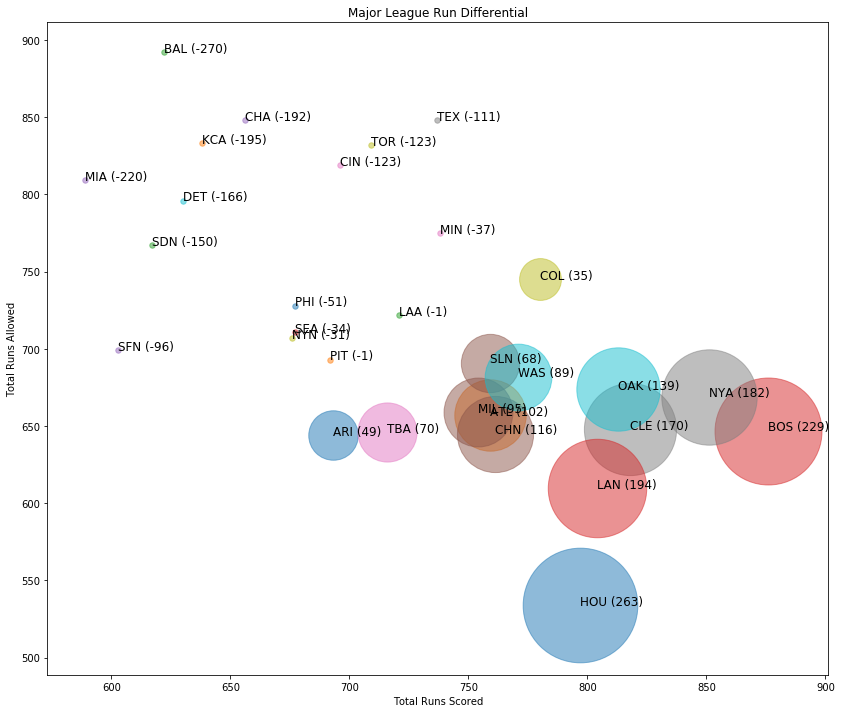

In [63]:
plt.figure(figsize=(14, 12))

for label, row in team_data.iterrows():
    TRS = row.Runs_Scored
    TRA = row.Runs_Allowed
    run_diff = TRS - TRA
    
    # We know that the greatest negative run differential is -270 (Baltimore Orioles), so add 271 to get a point for each team
    # THIS DOESN'T WORK WELL.  TEAMS WITH NEGATIVE VALUES SHOULDN'T HAVE A SIZE
#     area = 30 * (run_diff + 271)
    if run_diff < 0:
        area = 30
    else:
        area = 50 * run_diff
    text = row.teamID + ' (' + str(run_diff) + ')'
    plt.scatter(TRS, TRA, s=area, alpha=0.5)
    plt.text(TRS, TRA, text, fontsize=12)

plt.title("Major League Run Differential", fontsize=12)
plt.xlabel("Total Runs Scored", fontsize=10)
plt.ylabel("Total Runs Allowed", fontsize=10)

plt.show()

My Mets (NYN) are gave up 707 runs and scored 676 for -31 runs.  This stinks.  No wonder we're so bad.  At least we're not as bad as the Baltimore Orioles at -270 runs.

#### Batting and Pitching Statistics
Let's look at the batting and earned run averages for the teams and compare them with the league average.

In [27]:
# Empty arrays
labels = []
era = []
ba = []

# Loop to get data
for label, row in team_data.iterrows():
    labels.append(row.teamID)
    era.append(row.ERA)
    ba.append(row.Avg)
    
# Get the league earned run average:
sql_query = """SELECT ROUND(9 * CAST(SUM(ER) AS FLOAT)/SUM(IPOuts/3), 2) AS ERA
               FROM pitching
               WHERE yearID=2018"""

league_era = pd.read_sql_query(sql_query, baseballdb)
league_era = league_era.loc[0]

# Get the league batting average:
sql_query = """SELECT ROUND(CAST(SUM(H) AS FLOAT)/SUM(AB), 3) AS Avg
               FROM batting
               WHERE yearID=2018"""

league_ba = pd.read_sql_query(sql_query, baseballdb)
league_ba = league_ba.loc[0]
league_era[0], league_ba[0]

(4.18, 0.248)

Create a function to label the bar chart bars:

In [28]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

Look at the pitching details:

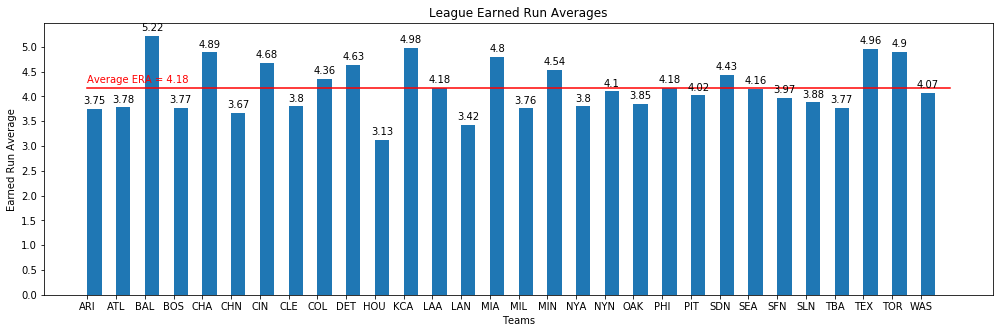

In [29]:
# Label locations
x = np.arange(len(labels))

# the width of the bars
width = 0.5

# Set the plot size
fig, ax = plt.subplots(figsize=(17,5))
rects = ax.bar(x + width/2, era, width)

# Present the data
ax.set_xlabel('Teams')
ax.set_ylabel('Earned Run Average')
ax.set_title('League Earned Run Averages')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0])

# Plot and label the league average Earned Run Average
ax.plot([0, 30], [league_era, league_era], "-r")
line_text = 'Average ERA = ' + str(league_era[0])
ax.annotate(line_text, xy=(0, league_era + 0.1), xycoords='data', color='red')

# Call the autolabel routine
autolabel(rects)

plt.show()

We are below league average Earned Run Average, so that's not too bad.  The league is at 4.18 and the Mets are at 4.10, so slightly better.

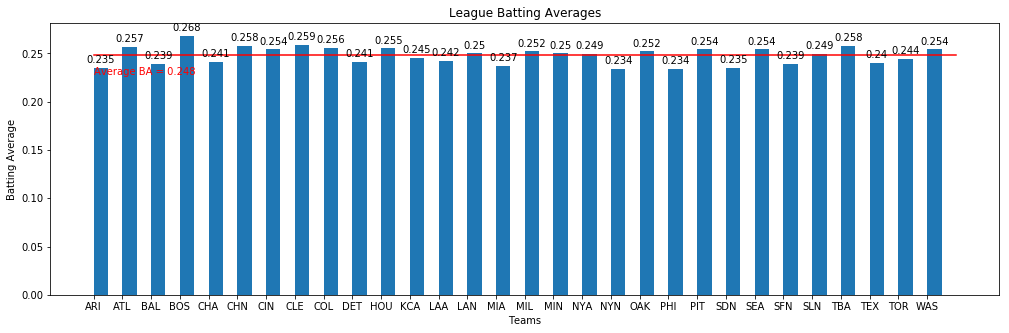

In [30]:
# Keep Label locations and bar width

# Set the plot size
fig, ax = plt.subplots(figsize=(17,5))
rects = ax.bar(x + width/2, ba, width)

# Present the data
ax.set_xlabel('Teams')
ax.set_ylabel('Batting Average')
ax.set_title('League Batting Averages')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.350])

# Plot the league average Batting Average
ax.plot([0, 30], [league_ba, league_ba], "-r")
line_text = 'Average BA = ' + str(league_ba[0])
ax.annotate(line_text, xy=(0, league_ba - 0.02), xycoords='data', color='red')

# Call the autolabel routine
autolabel(rects)

plt.show()

We are below the league average Batting Average: 0.234 vs. 0.248.  Not too good.  Our slightly better pitching is not enough to compensate for the ineptitude of our hitting.

#### Starting Pitching vs. Relief Pitching
What about starters vs. relievers?  To look at this information, I'll separate out the pitchers who have started games (GS) versus those who have not.  I still have the `Mets` pitching statistics in `mets_pitching`.  Separate starters from relievers by looking at the Games Started.  Make it a minimum of 10 games to eliminate spot starters.  (Include Matt Harvey, who was a starter before being traded.)

In [31]:
mets_starters = mets_pitching[(mets_pitching["Games Started"] > 10) | (mets_pitching["playerID"] == 'harvema01')]
mets_starters

,playerID,Name,Games,Wins,Losses,Games Started,Complete Games,Shutouts,Saves,Innings Pitched,Hits,Runs,Earned Runs,Walks,Intentional Walks,Hit by Pitch,Strikeouts,Batters Faced,Opp. Batting Avg.
7,degroja01,Jacob Anthony deGrom,32,10,9,32,1,0,0,217,152,48,41,46,3.0,5.0,269,835.0,0.196
13,harvema01,Matthew Edward Harvey,8,0,2,4,0,0,0,27,33,21,21,9,0.0,1.0,20,123.0,0.303
15,matzst01,Steven Jakob Matz,30,5,11,30,0,0,0,154,134,77,68,58,2.0,10.0,152,654.0,0.232
16,oswalco01,Corey Edward Oswalt,17,3,3,12,0,0,0,64,69,43,42,20,1.0,4.0,45,282.0,0.268
25,syndeno01,Noah Seth Syndergaard,25,13,4,25,2,1,0,154,148,55,52,39,2.0,7.0,155,644.0,0.250
26,vargaja01,Jason Matthew Vargas,20,7,9,20,0,0,0,92,100,60,59,30,1.0,5.0,84,404.0,0.276
28,wheelza01,Zachary Harrison Wheeler,29,12,7,29,0,0,0,182,150,69,67,55,0.0,9.0,179,744.0,0.225


In [32]:
mets_relievers = pd.concat([mets_pitching, mets_starters, mets_starters]).drop_duplicates(keep=False)
mets_relievers

,playerID,Name,Games,Wins,Losses,Games Started,Complete Games,Shutouts,Saves,Innings Pitched,Hits,Runs,Earned Runs,Walks,Intentional Walks,Hit by Pitch,Strikeouts,Batters Faced,Opp. Batting Avg.
0,bashlty01,Tyler Morris Bashlor,24,0,3,0,0,0,0,32,26,16,15,12,0.0,3.0,25,135.0,0.218
1,baumabu01,George Charles Baumann,3,0,1,0,0,0,0,3,7,8,8,5,2.0,0.0,4,21.0,0.438
2,bautige01,Gerson Bautista,5,0,1,0,0,0,0,4,8,6,6,5,0.0,0.0,3,25.0,0.444
3,beckch02,Christopher Michael Beck,6,0,0,0,0,0,0,10,10,6,6,9,0.0,0.0,5,46.0,0.270
4,blevije01,Jerry Richard Blevins,64,3,2,1,0,0,1,42,36,24,23,22,1.0,5.0,41,188.0,0.225
5,conlopj01,Patrick Joshua Conlon,3,0,0,2,0,0,0,7,15,7,7,2,0.0,0.0,5,38.0,0.417
6,copelsc01,Scott Reast Copeland,1,0,0,0,0,0,0,1,1,0,0,0,0.0,0.0,2,5.0,0.200
8,familje01,Jeurys Familia,40,4,4,0,0,0,17,40,36,13,13,14,1.0,2.0,43,171.0,0.234
9,flexech01,Christopher John Flexen,4,0,2,1,0,0,0,6,14,13,9,6,1.0,1.0,3,40.0,0.424
10,gagnodr01,Andrew Miles Gagnon,5,2,1,1,0,0,0,12,15,11,7,5,0.0,2.0,8,56.0,0.319


Let's compare their starting pitching to their relief pitching.  In this case, I'll look at total runs allowed and number of innings pitched.

In [33]:
starters_runs = np.sum(mets_starters.Runs)
starters_ip = np.sum(mets_starters["Innings Pitched"])

relievers_runs = np.sum(mets_relievers.Runs)
relievers_ip = np.sum(mets_relievers["Innings Pitched"])

starters_runs, starters_ip, relievers_runs, relievers_ip

(373, 890, 334, 562)

Let's mix it up by making two pie charts side-by-side:

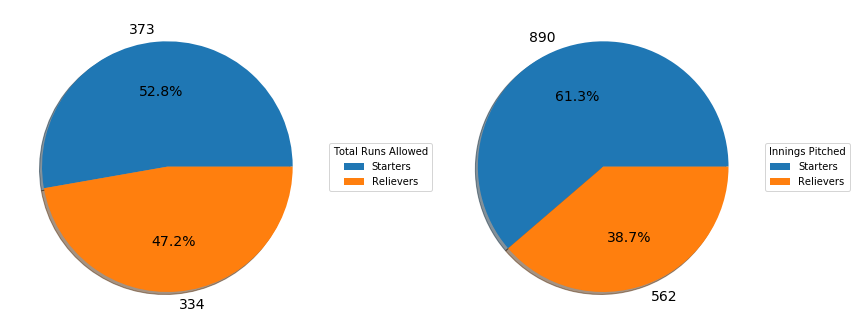

In [88]:
# Data
labels = 'Starters', 'Relievers'
runs = [starters_runs, relievers_runs]
ip = [starters_ip, relievers_ip]

# Make figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# A standard pie plot
ax[0].pie(runs, labels=runs, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 14})
ax[0].legend(labels, title="Total Runs Allowed", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax[1].pie(ip, labels=ip, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 14})
ax[1].legend(labels, title="Innings Pitched", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.tight_layout()
plt.show()

Here's a huge problem: the Mets relievers pitch only 38.7% of the innnings, but give up 47.2% of the runs.  This isn't nearly good enough.

## Conclusion 

In 2018, the `New York Mets` had starting pitching that was well above league average.  Their hitting was below league average and their relief pitching in particular was well below league average.

The best way to improve the ballclub would be to improve the bullpen.